In [69]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [70]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [74]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [75]:
#all this for converting TotalCharges from object to float
#removing any spaces in the column valus
df.rename(columns=lambda x: x.strip(), inplace=True)

#checking for unexpected values or character
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert, setting errors as NaN
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


df['TotalCharges']=df['TotalCharges'].astype(float)

In [76]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [78]:
#summary for numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80


In [79]:
#checking for null after conversion
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [80]:
#removing columns based on cardinality 
feature_card=df.select_dtypes(include=['number']).nunique()
print(feature_card)

feature_card2=df.select_dtypes(include=['object']).nunique()
print(feature_card2)

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6531
dtype: int64
customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64


In [81]:
df.drop(columns=['customerID'], inplace=True)

In [82]:
#checking for removed columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [83]:
#changing our categorical column from int too object
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [84]:
#splitting data into categorical and numeric
Target_var= "Churn"
cat_var=['SeniorCitizen','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
num_var=['tenure','MonthlyCharges','TotalCharges']

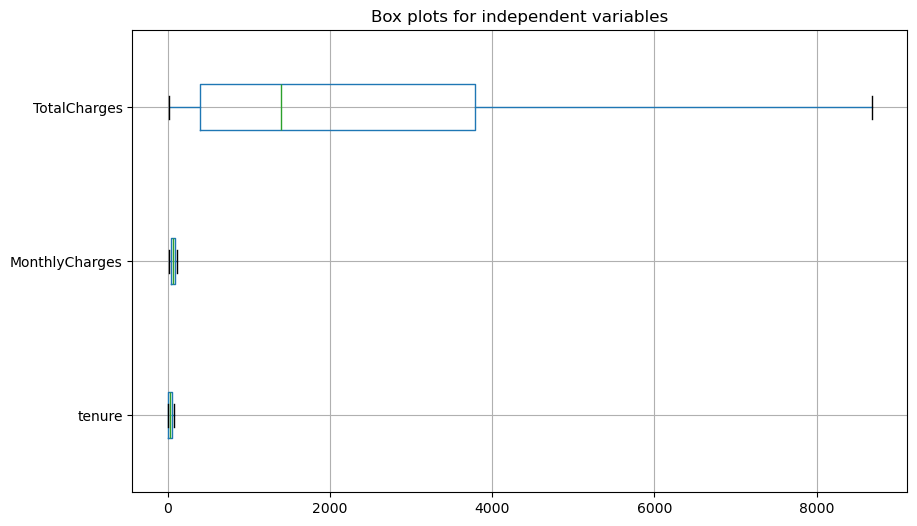

In [85]:
#boxplots for numeric columns 
fig, ax=plt.subplots(figsize=(10, 6))
boxplot= df[num_var].boxplot(vert=0, ax=ax)
_=ax.set_title("Box plots for independent variables")

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_in

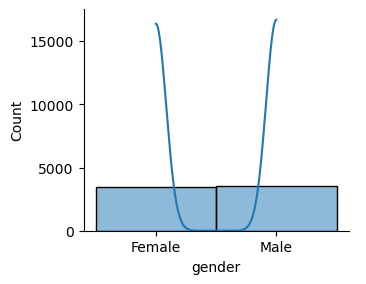

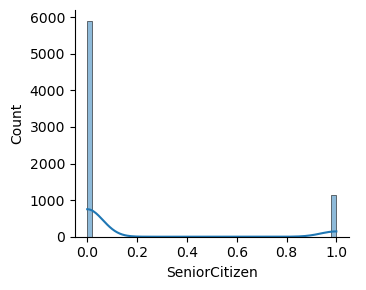

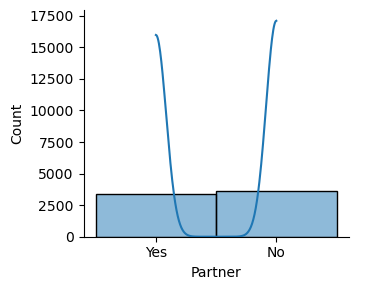

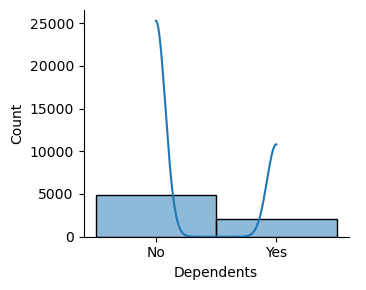

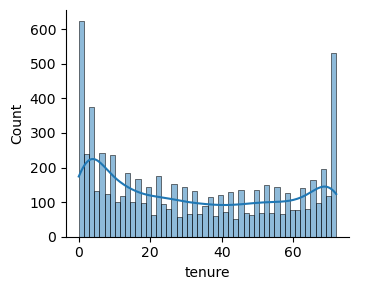

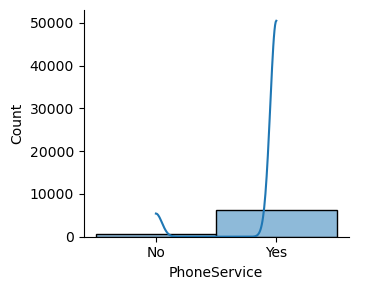

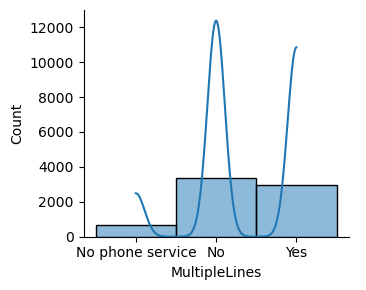

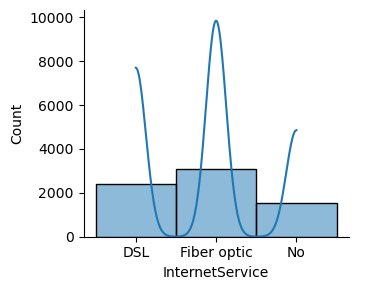

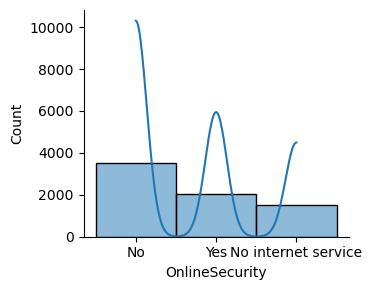

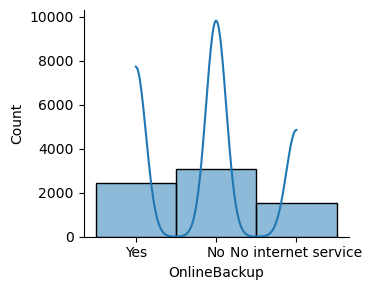

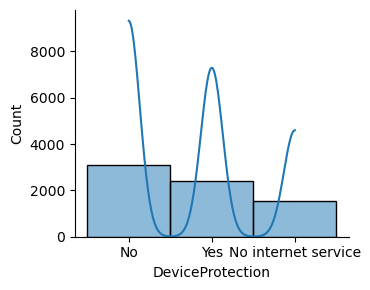

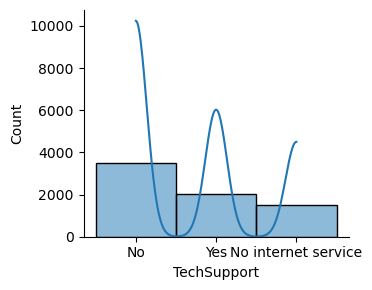

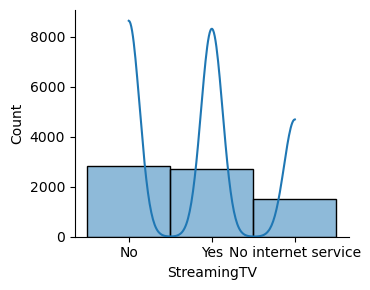

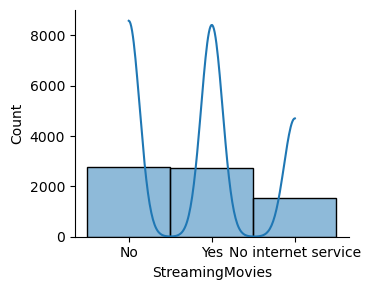

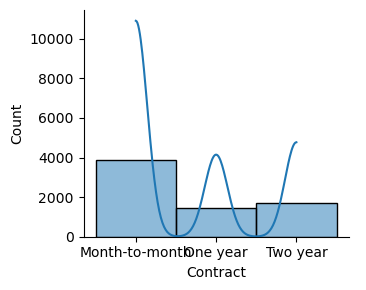

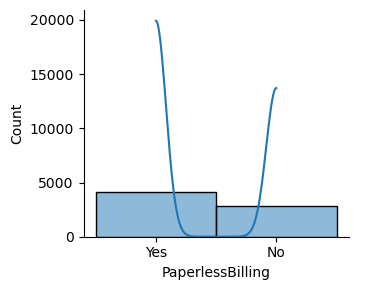

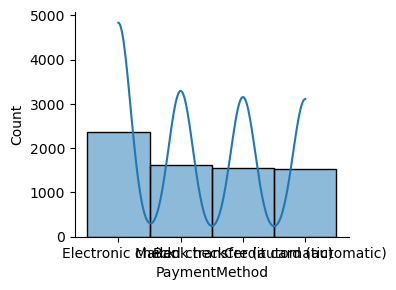

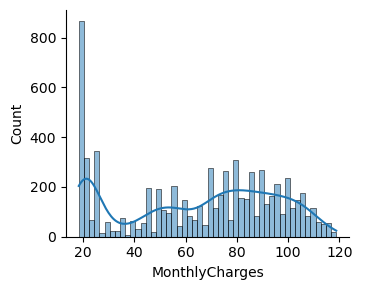

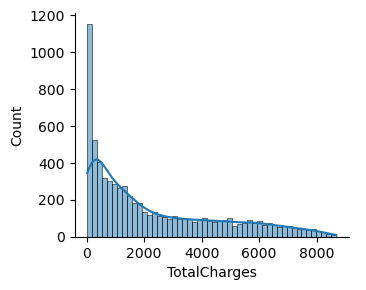

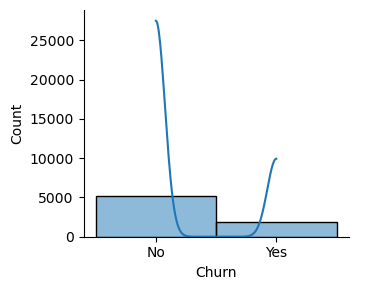

In [86]:
#histograms
for x in df.columns:
    sns.FacetGrid(df, aspect=1.2,).map(sns.histplot,x, bins=50, kde=True).add_legend()

In [87]:

#pip install category_encoders

In [88]:
#hot-ecoding 
from category_encoders import OneHotEncoder

df1 = pd.DataFrame(df)
                    
#instanstiate the encoder
ohe=OneHotEncoder(use_cat_names= True, cols=['gender','SeniorCitizen','OnlineBackup','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

#transform data
df2=ohe.fit_transform(df1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender_Female                            7043 non-null   int64  
 1   gender_Male                              7043 non-null   int64  
 2   SeniorCitizen_0.0                        7043 non-null   int64  
 3   SeniorCitizen_1.0                        7043 non-null   int64  
 4   Partner_Yes                              7043 non-null   int64  
 5   Partner_No                               7043 non-null   int64  
 6   Dependents_No                            7043 non-null   int64  
 7   Dependents_Yes                           7043 non-null   int64  
 8   tenure                                   7043 non-null   int64  
 9   PhoneService_No                          7043 non-null   int64  
 10  PhoneService_Yes                         7043 no

In [89]:
#view encoded data
df2.head(50)

,gender_Female,gender_Male,SeniorCitizen_0.0,SeniorCitizen_1.0,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,tenure,PhoneService_No,...,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,0,1,1,...,0,1,0,1,0,0,0,29.85,29.85,No
1,0,1,1,0,0,1,1,0,34,0,...,0,0,1,0,1,0,0,56.95,1889.50,No
2,0,1,1,0,0,1,1,0,2,0,...,0,1,0,0,1,0,0,53.85,108.15,Yes
3,0,1,1,0,0,1,1,0,45,1,...,0,0,1,0,0,1,0,42.30,1840.75,No
4,1,0,1,0,0,1,1,0,2,0,...,0,1,0,1,0,0,0,70.70,151.65,Yes
5,1,0,1,0,0,1,1,0,8,0,...,0,1,0,1,0,0,0,99.65,820.50,Yes
6,0,1,1,0,0,1,0,1,22,0,...,0,1,0,0,0,0,1,89.10,1949.40,No
7,1,0,1,0,0,1,1,0,10,1,...,0,0,1,0,1,0,0,29.75,301.90,No
8,1,0,1,0,1,0,1,0,28,0,...,0,1,0,1,0,0,0,104.80,3046.05,Yes
9,0,1,1,0,0,1,0,1,62,0,...,0,0,1,0,0,1,0,56.15,3487.95,No


In [93]:
#baivariante analysis
#correlation
df2.drop(columns=['Churn'], inplace=True)
df2.corr()

,gender_Female,gender_Male,SeniorCitizen_0.0,SeniorCitizen_1.0,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,tenure,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges
gender_Female,1.000000,-1.000000,-0.001874,0.001874,0.001808,-0.001808,0.010517,-0.010517,-0.005106,-0.006488,...,-0.008026,0.003695,0.011754,-0.011754,-0.000752,-0.013744,0.016024,-0.001215,0.014569,-0.000048
gender_Male,-1.000000,1.000000,0.001874,-0.001874,-0.001808,0.001808,-0.010517,0.010517,0.005106,0.006488,...,0.008026,-0.003695,-0.011754,0.011754,0.000752,0.013744,-0.016024,0.001215,-0.014569,0.000048
SeniorCitizen_0.0,-0.001874,0.001874,1.000000,-1.000000,-0.016479,0.016479,-0.211185,0.211185,-0.016567,0.008576,...,0.046262,0.117000,-0.156530,0.156530,-0.171718,0.153477,0.016159,0.024135,-0.220173,-0.102395
SeniorCitizen_1.0,0.001874,-0.001874,-1.000000,1.000000,0.016479,-0.016479,0.211185,-0.211185,0.016567,-0.008576,...,-0.046262,-0.117000,0.156530,-0.156530,0.171718,-0.153477,-0.016159,-0.024135,0.220173,0.102395
Partner_Yes,0.001808,-0.001808,-0.016479,0.016479,1.000000,-1.000000,-0.452676,0.452676,0.379697,-0.017706,...,0.082783,0.248091,-0.014877,0.014877,-0.083852,-0.095125,0.110706,0.082029,0.096848,0.318812
Partner_No,-0.001808,0.001808,0.016479,-0.016479,-1.000000,1.000000,0.452676,-0.452676,-0.379697,0.017706,...,-0.082783,-0.248091,0.014877,-0.014877,0.083852,0.095125,-0.110706,-0.082029,-0.096848,-0.318812
Dependents_No,0.010517,-0.010517,-0.211185,0.211185,-0.452676,0.452676,1.000000,-1.000000,-0.159712,-0.001762,...,-0.068368,-0.204613,0.111377,-0.111377,0.150642,-0.059071,-0.052021,-0.060267,0.113890,-0.064535
Dependents_Yes,-0.010517,0.010517,0.211185,-0.211185,0.452676,-0.452676,-1.000000,1.000000,0.159712,0.001762,...,0.068368,0.204613,-0.111377,0.111377,-0.150642,0.059071,0.052021,0.060267,-0.113890,0.064535
tenure,-0.005106,0.005106,-0.016567,0.016567,0.379697,-0.379697,-0.159712,0.159712,1.000000,-0.008448,...,0.202570,0.558533,0.006152,-0.006152,-0.208363,-0.233852,0.243510,0.233006,0.247900,0.824757
PhoneService_No,-0.006488,0.006488,0.008576,-0.008576,-0.017706,0.017706,-0.001762,0.001762,-0.008448,1.000000,...,0.002791,-0.003519,-0.016505,0.016505,-0.003062,0.003319,-0.007556,0.007721,-0.247398,-0.112851


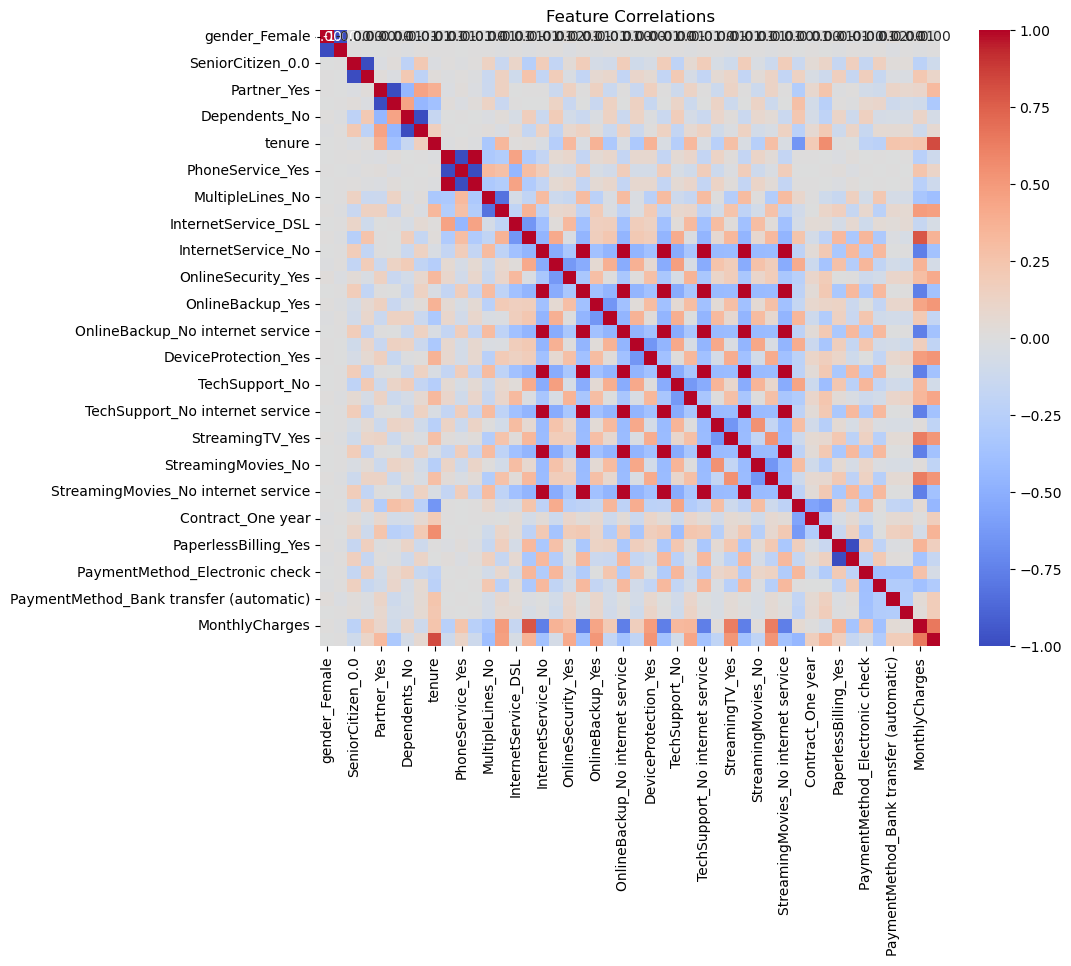

In [94]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()